#다차원 선형회귀 실습
## keyword : 표준화, 벡터화 연산


In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm
import csv


train_set = []
test_set = []

with open("/content/drive/My Drive/Colab Notebooks/assignment-02/data_train.csv", newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        train_set.append([1,float(i[0]),float(i[1]),float(i[2]),float(i[3])])

with open("/content/drive/My Drive/Colab Notebooks/assignment-02/data_test.csv", newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        test_set.append([1,float(i[0]),float(i[1]),float(i[2]),float(i[3])])   

train_set = np.array(train_set)
test_set = np.array(test_set)




정체미상의 데이터들입니다.  
- load the training data file ('data.txt')
- each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$
- $x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [0]:
for i in range(1,5):
    mu = np.mean(train_set[:,i])
    s = np.std(train_set[:,i])
    train_set[:,i] = (train_set[:,i]-mu)/s
    test_set[:,i] = (test_set[:,i]-mu)/s

다변수를 선형회귀 하므로 각각의 분포가 엇비슷해지도록 (빠른 학습을 위해) 조금의 변환을 가합니다.
$$ x_j^{(i)} = \frac{x_j^{(i)}-\mu}{S} $$ (그리고 y도)

이때 $\mu$와 $S$는 단위의 변환이 될 것이므로, ~~균등한 변화를 위해 트레이닝 셋과 테스트 셋 전체에서 추출하여 각각에 적용합니다.~~  
트레이닝 셋만을 가지고 학습하는 것이므로 트레이닝 셋에서만 $\mu$와 $S$를 추출합니다.  
다만, 어떤 테스트 셋이 주어져도, 같은 변환은 필요하므로 변환은 적용합니다.

이 변환에는 테스트 셋과 트레이닝 셋이 같은 분포에서 추출했다는 가정과
데이터가 정규성을 띈다는 가정이 적용됩니다.


# Input points

1. plot a set of training set's points $ \{(x_0^{(i)},x_1^{(i)},x_2^{(i)},x_3^{(i)},y^{(i)})\}$  
2. plot a set of testing set's points $ \{(x_0^{(i)},x_1^{(i)},x_2^{(i)},x_3^{(i)},y^{(i)})\}$  


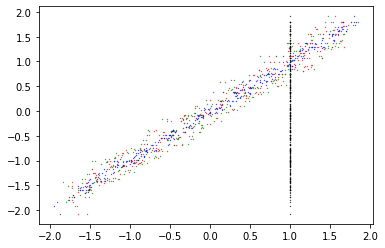

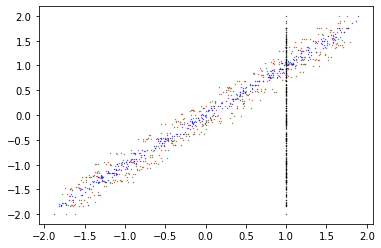

In [0]:
plt.scatter(train_set[:,0],train_set[:,4], c="black", s=0.1)
plt.scatter(train_set[:,1],train_set[:,4], c="red", s=0.1)
plt.scatter(train_set[:,2],train_set[:,4], c="green", s=0.1)
plt.scatter(train_set[:,3],train_set[:,4], c="blue", s=0.1)

plt.show()

plt.scatter(test_set[:,0],test_set[:,4], c="black", s=0.1)
plt.scatter(test_set[:,1],test_set[:,4], c="red", s=0.1)
plt.scatter(test_set[:,2],test_set[:,4], c="green", s=0.1)
plt.scatter(test_set[:,3],test_set[:,4], c="blue", s=0.1)
plt.show()

- $\hat{h} = \sigma(z)$ 
- $z = \theta_0 + \theta_1 x + \theta_2 y`$, where $`\theta_0, \theta_1, \theta_2 \in \mathbb{R}$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

- $J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$


---




위의 플롯을 보니 $\theta_{initial}$은 $[0,1,1,1]$이 제일 적합할 것 같습니다.

함수 h(th0, th1, x)를 정의하여 편의를 위해 사용한다.  



---



- $\theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$
- $\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use any initial conditions $(\theta_0^{(0)}, \theta_1^{(0)}, \theta_2^{(0)})$


이것을 바탕으로 다음 $\theta$를 정해봅니다.



In [0]:
alpha = 0.0003
m = len(train_set)

def h(th, x):
    return np.matmul(th,x)

def J(th, data): 
    return (1/(2*m)) * np.sum((h(th, np.transpose(data[:,0:4]))- data[:,4]) ** 2)

def th_cal(th):
    result = []
    diff = (h(th, np.transpose(train_set[:,0:4])) - train_set[:,4])
    for j in range(len(th)):
        result.append( th[j]-(alpha * (1/m) * np.sum(  diff * train_set[:,j] )) )
    return np.array(result)


In [0]:
g_th = np.array([0,1,1,1])
J_log_train = [J(g_th, train_set)]
J_log_test = [J(g_th, test_set)]
th_log = [g_th]


# import sys
e = 5.6*10 ** (-8)
from tqdm import tqdm, trange

for i in tqdm(range(100000)):
    g_th = th_cal(g_th)
    J_log_train.append(J(g_th, train_set))
    J_log_test.append(J(g_th, test_set))
    th_log.append(g_th)
    if abs(J(g_th, test_set) - J_log_test[-2]) <=e and abs(J(g_th, train_set) - J_log_train[-2]) <=e and np.sum (g_th -th_log[-2]) <= 4*e:
        break


  7%|▋         | 7489/100000 [00:00<00:10, 8781.97it/s]


In [0]:
print(J_log_train[-2])
print(J_log_test[-2])

0.010062184319327363
0.010884210481490535




---



# Plot the estimated parameters using the training dataset [3pt]


1. plot the estimated parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$ at every iteration of gradient descent until convergence
2. the colors for the parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$ should be black, red, green, blue, respectively
3. the optimization is performed using the training dataset ('data_train.csv')

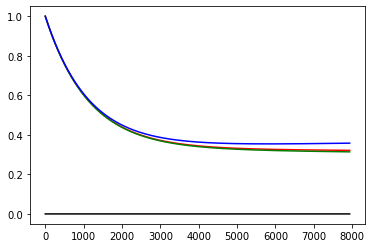

In [0]:
th_log = np.array(th_log)
#플롯을 위한 준비


plt.plot(th_log[:,0],c='black')
plt.plot(th_log[:,1],c='red')
plt.plot(th_log[:,2],c='green')
plt.plot(th_log[:,3],c='blue')
plt.show()

# Plot the training error using the training dataset [4pt]

1. plot the training error $J(\theta_0, \theta_1, \theta_2, \theta_3)$ at every iteration of gradient descent until convergence (in blue color)

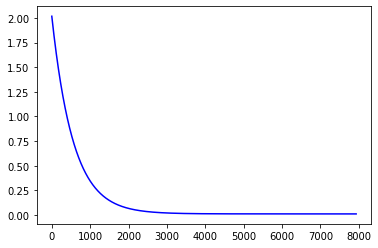

In [0]:
plt.plot(J_log_train,c='blue')
plt.show()

# Plot the testing error using the testing dataset at every iteration of gradient descent until convergence [5pt]

1. plot the testing error $J(\theta_0, \theta_1, \theta_2, \theta_3)$ at every iteration of gradient descent until convergence (in red color)

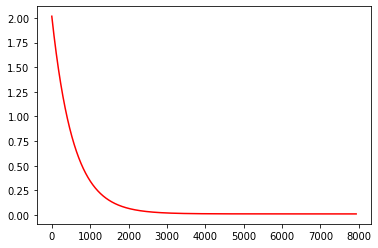

In [0]:
plt.plot(J_log_train,c='red')
plt.show()